In [45]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
States_with_avg_rain_temps = "States_with_avg_rain_temps.csv"
Happiest_cities_list = "Happiest_cities_list.csv"

# Read the City and Ride Data
states_weather_df = pd.read_csv(States_with_avg_rain_temps, encoding = "latin")
happiest_cities_df = pd.read_csv(Happiest_cities_list, encoding = "latin")

#happiest_cities_df.head()
states_weather_df.head()
states_weather_df.columns

happiest_cities_df.head()
states_weather_df.head()

,State,State Abb,Avg Temprature,Population,Total Happiness Score,Count of Happiest Cities,Avg Rain INC,Avg Rain MM,Rank by Percipitation,State sunny,Place,Sun,Total Hours,Clear Days
0,Alabama,AL,62.68,4817678,185.48,4,58.3,1480.0,4.0,Alabama,Birmingham,58.0,2641.0,99.0
1,Alaska,AK,32.03,728300,110.74,2,22.5,572.0,39.0,Alaska,Anchorage,41.0,2061.0,61.0
2,Arizona,AR,65.97,6561516,84.73,2,13.6,345.0,47.0,Arizona,Tucson,85.0,3806.0,193.0
3,Arkansas,AZ,60.09,2947036,541.98,9,50.6,1284.0,8.0,Arkansas,Fort Smith,61.0,2771.0,123.0
4,California,CA,61.17,38066920,1760.69,29,22.2,563.0,40.0,California,San Diego,68.0,3055.0,146.0


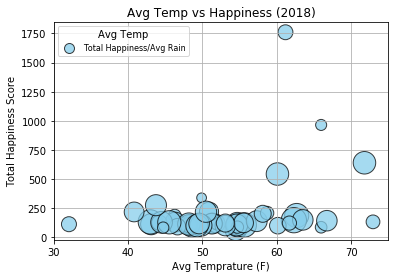

In [57]:
plt.scatter(states_weather_df['Avg Temprature'], states_weather_df['Total Happiness Score'], marker="o", facecolors="skyblue", 
                    edgecolors="black",s= 10*states_weather_df['Avg Rain INC'], alpha= '0.75', label = 'Total Happiness/Avg Rain')

legend = plt.legend(title="Avg Temp", loc='best', prop={'size': 8})
legend.legendHandles[0]._sizes = [100]

plt.grid()
# Create a title, x label, and y label for our chart
plt.title("Avg Temp vs Happiness (2018)")
plt.xlabel("Avg Temprature (F)")
plt.ylabel("Total Happiness Score")

plt.savefig("Avg Temp vs Happiness (2018).png")

plt.show()

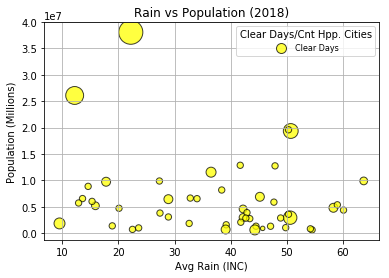

In [55]:
plt.scatter(states_weather_df['Avg Rain INC'], states_weather_df['Population'], marker="o", facecolors="yellow", 
                    edgecolors="black",s= 20*states_weather_df['Count of Happiest Cities'], alpha= '0.75', label = 'Clear Days')

legend = plt.legend(title="Clear Days/Cnt Hpp. Cities", loc='best', prop={'size': 8})
legend.legendHandles[0]._sizes = [100]
#legend.legendHandles[1]._sizes = [100]
plt.grid()
# Create a title, x label, and y label for our chart
plt.title("Rain vs Population (2018)")
plt.xlabel("Avg Rain (INC)")
plt.ylabel("Population (Millions)")

plt.savefig("Rain vs Population (2018).png")

plt.show()

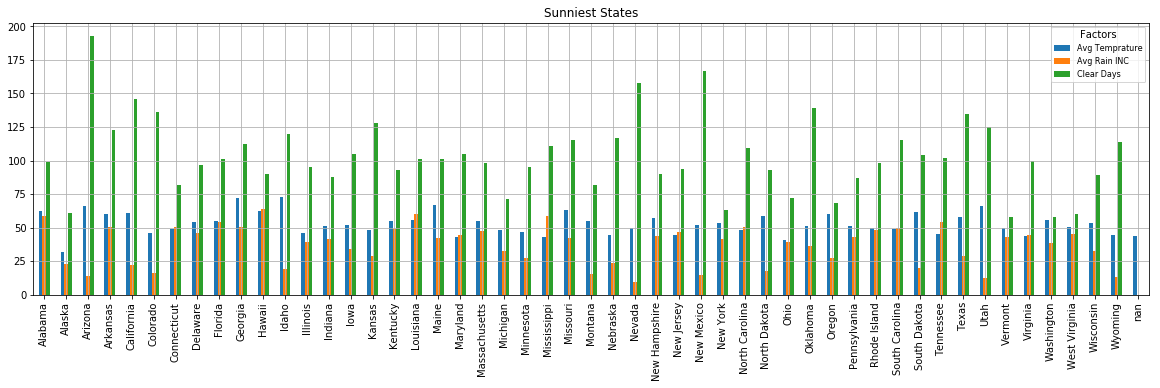

In [48]:

reduced_df = states_weather_df[['State sunny','Avg Temprature','Avg Rain INC','Clear Days']]
reduced_df.head()

#sorted_states_weather_df = states_weather_df.sort_values(['State'] ascend= False)

# Set x axis and tick locations
x_axis = np.arange(len(reduced_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = reduced_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(reduced_df["State sunny"], rotation='vertical')

legend = plt.legend(title="Factors", loc='best', prop={'size': 8})
#legend.legendHandles[0]._sizes = [100]

plt.grid()
# Create a title, x label, and y label for our chart
plt.title("Sunniest States")

plt.savefig("Sunniest States.png")

plt.show()

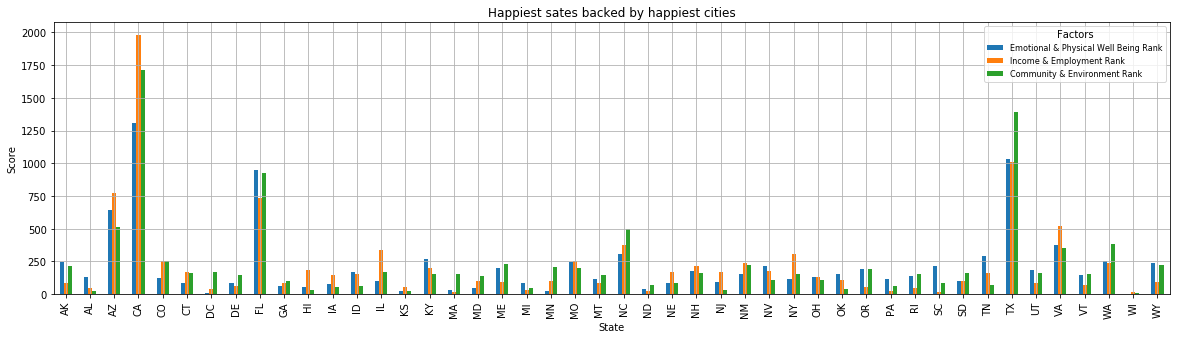

In [58]:
#grouped_happiest_cities_df = happiest_cities_df.groupby(['State abb'])


loc_Happiest_states_df = happiest_cities_df.loc[(happiest_cities_df['Total Score'] >49.99)]

loc_Happiest_states_df.count()


reduced_happiest_cities_df = loc_Happiest_states_df[['State abb', 'Emotional & Physical Well Being Rank','Income & Employment Rank','Community & Environment Rank']]
reduced_happiest_cities_df.head

concise_cities_df = reduced_happiest_cities_df.groupby(['State abb']).sum().reset_index()

#['Emotional & Physical Well Being Rank','Income & Employment Rank','Community & Environment Rank'].sum().reset_index()

# Set x axis and tick locations
x_axis = np.arange(len(concise_cities_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
#plt.figure(figsize=(20,3))

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = concise_cities_df.plot(kind="bar", figsize=(20,5))
#plt.xticklabels()
# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(concise_cities_df["State abb"], )
legend = plt.legend(title="Factors", loc='best', prop={'size': 8})

#multi_plot.axes.get_xaxis().set_ticks([])
plt.grid()

# Create a title, x label, and y label for our chart
plt.title("Happiest sates backed by happiest cities")
plt.xlabel("State")
plt.ylabel("Score")

plt.savefig("Happiest States.png")
plt.show()

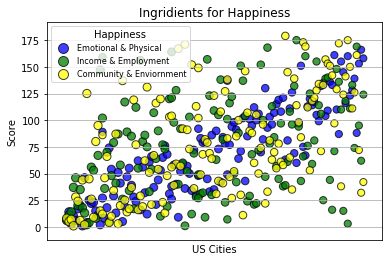

In [59]:
# DATASET 3
#total_players = len(purchase_data_df["SN"].unique())
loc_Happiest_states_df = happiest_cities_df.loc[(happiest_cities_df['Total Score'] > 49.99)]

state_ep_df = loc_Happiest_states_df[['Total Score',"State abb", 'City','Emotional & Physical Well Being Rank', 'Income & Employment Rank',
       'Community & Environment Rank']]

#concise_states_df = state_ep_df.groupby(['State abb']).sum().reset_index()

#init_state_ep_df
#state_ep_df = init_state_ep_df.groupby(['State abb']).sum().reset_index()

scat_1 = plt.scatter(state_ep_df['City'],state_ep_df['Emotional & Physical Well Being Rank'],  marker="o", facecolors="blue", 
                    edgecolors="black",s= state_ep_df['Total Score'], alpha= '0.75', label = 'Emotional & Physical')
#plt.scatter.axes.get_xaxis().set_ticks([])

scat_2 = plt.scatter(state_ep_df['City'],state_ep_df['Income & Employment Rank'],  marker="o", facecolors="green", 
                    edgecolors="black",s= state_ep_df['Total Score'], alpha= '0.75', label = 'Income & Employment')
#plt.scatter.axes.get_xaxis().set_ticks([])

scat_3 = plt.scatter(state_ep_df['City'],state_ep_df['Community & Environment Rank'], marker="o", facecolors="yellow", 
                    edgecolors="black",s= state_ep_df['Total Score'], alpha= '0.75', label = 'Community & Enviornment')
#plt.scatter.axes.get_xaxis().set_ticks([])

legend = plt.legend(title="Happiness", loc='best', prop={'size': 8})
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]

plt.grid()   

scat_1.axes.get_xaxis().set_ticks([])
scat_2.axes.get_xaxis().set_ticks([])
scat_3.axes.get_xaxis().set_ticks([])

# Create a title, x label, and y label for our chart
plt.title('Ingridients for Happiness')
plt.xlabel("US Cities")
plt.ylabel("Score")
plt.savefig("Ingridients for Happiness.png")
plt.show()    

#state_ep_df = state_ep_df["State abb"]=='CA'
#loc_Happiest_states_df = happiest_cities_df.loc[(happiest_cities_df['Total Score'] >49.99)]